In [1]:
import numpy as np
#import sklearn.ensemble as ske
import matplotlib.pyplot as plt
from sklearn import svm, grid_search, datasets
from sklearn.ensemble import RandomForestClassifier as RFC
import pandas as pd
%matplotlib inline
import random
from sklearn.metrics import confusion_matrix
from sklearn import cross_validation as cv
from sklearn.utils import shuffle

In [2]:
# データをロードしてシャッフル
iris = datasets.load_iris()
data,target=shuffle(iris.data,iris.target)

In [3]:
# ランダムフォレスト分類器の作成
classifier=RFC()

In [4]:
# ２分割クロスバリデーション
n_samples, n_features = data.shape
half = n_samples / 2
# シャッフル後のデータの前半を用いて学習する
classifier.fit(data[:half],target[:half])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [5]:
# シャッフル後のデータの後半を予測する
pred = classifier.predict(data[half:])
pred

array([1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 1, 0, 0, 2, 1])

In [6]:
# 正解はこちら
target_test = target[half:]
target_test

array([1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 1, 0, 0, 2, 1])

In [7]:
# 予測と正解の比較。第一引数が行、第二引数が列を表す。
#pd.DataFrame(confusion_matrix([0, 0, 0],[1,1,1])) #縦横が分からなくなったらこれを実行する
pd.DataFrame(confusion_matrix(pred, target_test))

,0,1,2
0,25,0,0
1,0,21,0
2,0,2,27


In [8]:
# cv=5 で５分割クロスバリデーションし精度を計算
score=cv.cross_val_score(classifier,data,target,cv=5,n_jobs=-1)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.9400 (+/- 0.0389)


In [9]:
#どのレコードがどのラベルっぽいか予測された数字。
pd.DataFrame(classifier.predict_proba(data[half:])).T

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0,1,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0.9,0,0
1,1,0,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,0,0.1,0,1
2,0,0,1,0,1,1,0,0,0,1,...,0,1,1,0,0,0,0,0.0,1,0


In [10]:
# 各説明変数の寄与度
classifier.feature_importances_

array([ 0.07622649,  0.04457678,  0.43818701,  0.44100972])

In [11]:
# 寄与度の大きい順に並べる
ranking = np.argsort(classifier.feature_importances_)[::-1]
ranking

array([3, 2, 0, 1])

In [12]:
# 大きい順に並んだ寄与度
important_features = classifier.feature_importances_[ranking]
important_features

array([ 0.44100972,  0.43818701,  0.07622649,  0.04457678])

(0, 4)

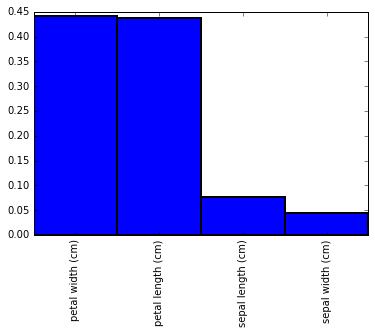

In [13]:
# 寄与度の大きい成分
ax = plt.subplot(111)
plt.bar(np.arange(len(important_features)),
       important_features, width=1, lw=2)
ax.set_xticks(np.arange(len(important_features))+.5)
ax.set_xticklabels([iris.feature_names[n] for n in ranking], rotation='vertical')
plt.xlim(0, len(important_features))

In [14]:
# 予測を難しくするため、不要な特徴量（ノイズ）を加える
m = 96
np.random.seed(0)
data = np.c_[data, np.random.randn(n_samples, m)]
feature_names = iris.feature_names
for i in range(96):
    feature_names.append(i)

In [15]:
# データの前半を用いて学習する
classifier.fit(data[:half],target[:half])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
# データの後半を予測する
pred = classifier.predict(data[half:])
pred

array([1, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2,
       0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0,
       1, 1, 0, 0, 2, 2])

In [17]:
# 正解はこちら
target_test = target[half:]
target_test

array([1, 0, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 2,
       0, 0, 1, 1, 1, 2, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 1, 0,
       0, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 1, 0, 0, 2, 1])

In [18]:
# 予測と正解の比較。第一引数が行、第二引数が列を表す。
#pd.DataFrame(confusion_matrix([0, 0, 0],[1,1,1])) #縦横が分からなくなったらこれを実行する
pd.DataFrame(confusion_matrix(pred, target_test))

,0,1,2
0,25,0,0
1,0,18,10
2,0,5,17


In [19]:
# cv=5 で５分割クロスバリデーションし精度を計算。さっきよりは下がったはず
score=cv.cross_val_score(classifier,data,target,cv=5,n_jobs=-1)
print("Accuracy: {0:04.4f} (+/- {1:04.4f})".format(score.mean(),score.std()))

Accuracy: 0.8733 (+/- 0.0389)


In [20]:
#どのレコードがどのラベルっぽいか予測された数字。
pd.DataFrame(classifier.predict_proba(data[half:])).T

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,0.1,0.9,0.1,0.9,0.1,0.1,0.0,0.0,0.1,0.0,...,0.9,0.2,0.1,0.8,0.1,0.0,0.9,0.5,0.2,0.2
1,0.7,0.1,0.4,0.0,0.5,0.3,0.5,0.5,0.6,0.4,...,0.1,0.3,0.8,0.2,0.6,0.5,0.1,0.4,0.3,0.3
2,0.2,0.0,0.5,0.1,0.4,0.6,0.5,0.5,0.3,0.6,...,0.0,0.5,0.1,0.0,0.3,0.5,0.0,0.1,0.5,0.5


(0, 100)

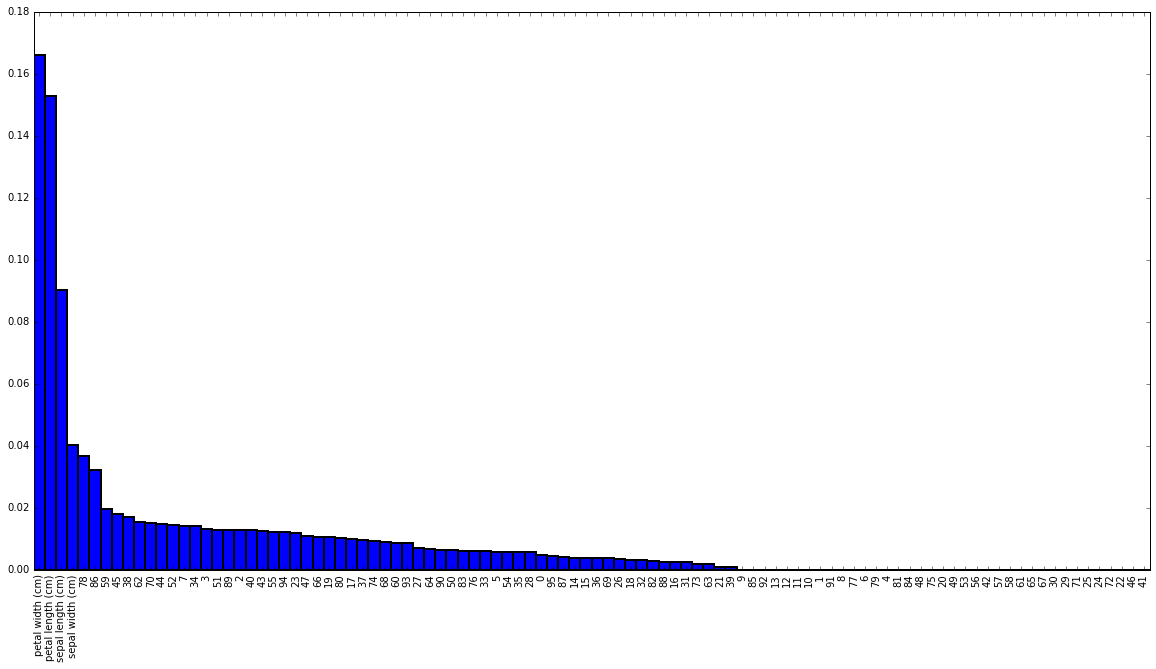

In [21]:
# どの変数の寄与度が大きいか。（加えたノイズは寄与度が低くなるはず）
ranking = np.argsort(classifier.feature_importances_)[::-1]
important_features = classifier.feature_importances_[ranking]
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.bar(np.arange(len(important_features)),
       important_features, width=1, lw=2)
ax.set_xticks(np.arange(len(important_features))+.5)
ax.set_xticklabels([iris.feature_names[n] for n in ranking], rotation='vertical')
plt.xlim(0, len(important_features))

In [22]:
# ベストなパラメーターを探し当てるためのグリッドサーチ
parameters = {
        'n_estimators'      : [50, 100], # The number of trees in the forest.
        #'max_features'      : [3, 5, 10, 15, 20], # The number of features to consider when looking for the best split:
        # 'random_state'      : [0],
        'n_jobs'            : [-1],
        'min_samples_split' : [10, 30],
        'max_depth'         : [10, 30],
        'criterion' : ['gini', 'entropy']
}
clf = grid_search.GridSearchCV(classifier, parameters)
clf.fit(data, target)
 
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
